In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
parameters=dict()
parameters["W1"]=np.array(pd.read_csv('W1.csv',header=None))
parameters["W2"]=np.array(pd.read_csv('W2.csv',header=None))
parameters["b1"]=np.array(pd.read_csv('b1.csv',header=None))
parameters["b2"]=np.array(pd.read_csv('b2.csv',header=None))


In [3]:
parameters["W1"].shape

(150, 784)

In [4]:
def forward_prop(A_prev,W,b):
    #Calculates Z
    Z=np.dot(W,A_prev)+b
    assert(Z.shape==(W.shape[0],A_prev.shape[1]))
    return Z

In [5]:
def forward_act(A_prev,W,b,activation):
    #Input -Type of activation
    #Output-Activation
    Z=forward_prop(A_prev,W,b)
    if activation=='sigmoid':
        A=1/(1+np.exp(-Z))
    elif activation=='relu':
        A=np.maximum(0,Z)
    elif activation=='tanh':
        A=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
    elif activation=='softmax':
        A=np.exp(Z)/np.sum(np.exp(Z),axis=0,keepdims=True)
        
    assert(Z.shape==(W.shape[0],A_prev.shape[1]))    
    return A ,Z   

In [6]:
def L_layer_forward(X,parameters):
    l=int(len(parameters)/2)
    A_prev=X
    Z_caches=[]
    A_caches=[]
    A_caches.append(X)
    #caches.append(X)
    for i in range(l):
        if i==l-1:  
            AL,cache=forward_act(A_prev,parameters["W"+str(i+1)],parameters["b"+str(i+1)],'softmax')
        else:
            A,cache=forward_act(A_prev,parameters["W"+str(i+1)],parameters["b"+str(i+1)],'relu')
            A_prev=A
            A_caches.append(A_prev)
        Z_caches.append(cache)
    A_caches.append(AL)
    
   # assert(AL.shape==(n_y,m))
    return AL,Z_caches,A_caches

In [7]:
import scipy
from scipy import ndimage

In [21]:
img1=plt.imread('Downloads/img/i.jpeg')
img1=scipy.misc.imresize(img1,size=img1.shape)
img2=img1[:,:,0]/3+img1[:,:,1]/3+img1[:,:,2]/3
#Slicing the important part of img
v_s=0
v_e=img2.shape[0]

h_s=0
h_e=img2.shape[1]

for i in range(img2.shape[0]):
    if np.min(img2[i,:])>30:
        v_s+=1
    else:
        break
for i in reversed(range(img2.shape[0])):        
    if (np.min(img2[i,:]))>30:
        v_e-=1
    else:
        break     
for i in range(img2.shape[1]):
    if np.min(img2[:,i])>30:
        h_s+=1
    else:
        break
for i in reversed(range(img2.shape[1])):        
    if np.min(img2[:,i])>30:
        h_e-=1
    else:
        break    
#Slicing that image
img3=img2[v_s:v_e,h_s:h_e]       
#Maintaining the aspect ratio 
ih=h_e-h_s
iv=v_e-v_s
if ih>iv:
    p=int((ih-iv)/2)
    img4=np.pad(np.array(img3),((p,p),(0,0)),'constant',constant_values=(255,255))   
else:
    p=int((iv-ih)/2)
    img4=np.pad(np.array(img3),((0,0),(p,p)),'constant',constant_values=(255,255))
           
img5=scipy.misc.imresize(img4,size=(20,20))
#img7=np.pad(img5,((4,4),(4,4)),'constant',constant_values=(255,255))
#better below


"img1=scipy.misc.imresize(img1,size=img1.shape)\nimg2=img1[:,:,0]/3+img1[:,:,1]/3+img1[:,:,2]/3\n#Slicing the important part of img\nv_s=0\nv_e=img2.shape[0]\n\nh_s=0\nh_e=img2.shape[1]\n\nfor i in range(img2.shape[0]):\n    if np.min(img2[i,:])>30:\n        v_s+=1\n    else:\n        break\nfor i in reversed(range(img2.shape[0])):        \n    if (np.min(img2[i,:]))>30:\n        v_e-=1\n    else:\n        break     \nfor i in range(img2.shape[1]):\n    if np.min(img2[:,i])>30:\n        h_s+=1\n    else:\n        break\nfor i in reversed(range(img2.shape[1])):        \n    if np.min(img2[:,i])>30:\n        h_e-=1\n    else:\n        break    \n#Slicing that image\nimg3=img2[v_s:v_e,h_s:h_e]       \n#Maintaining the aspect ratio \nih=h_e-h_s\niv=v_e-v_s\nif ih>iv:\n    p=int((ih-iv)/2)\n    img4=np.pad(np.array(img3),((p,p),(0,0)),'constant',constant_values=(255,255))   \nelse:\n    p=int((iv-ih)/2)\n    img4=np.pad(np.array(img3),((0,0),(p,p)),'constant',constant_values=(255,255))\n   

In [ ]:
def find_centroid(img):
    x_cm=0
    y_cm=0
    img=255-img
    for i in range(1,img.shape[0]+1):
        y_cm+=np.sum(i*img[:,i-1])
    for i in range(1,img.shape[1]+1):
        x_cm+=np.sum(i*img[i-1,:])
    y_cm=int(y_cm/np.sum(img))
    x_cm=int(x_cm/np.sum(img))
    return x_cm,y_cm

In [ ]:
x,y= find_centroid(img5)
print(x)
print(y)

In [ ]:
def padder(img,x,y):

    k=10-y
    h=10-x
        
        
        
    img = np.pad(np.array(img), ((4+h, 4-h), (4+k, 4-k)), 'constant', constant_values=(255, 255))
    return(img)    

In [ ]:
img6=padder(img5,x,y)


In [ ]:
x1,y1=find_centroid(img6)
print(x1,y1)

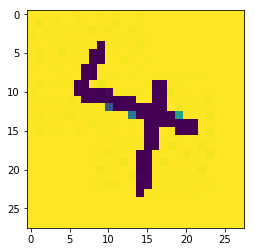

In [22]:
plt.imshow(img6)

4


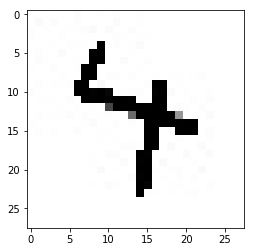

In [23]:
X1=img6
X2=X1.reshape(28*28,1)/255
X3=1-X2
A,zc,ac=L_layer_forward(X3,parameters)
temp=(A>=np.max(A))
predict=0
for i in range(temp.shape[0]):
    if temp[i]==1:
        predict+=i
#print(temp)
print(predict)        
plt.imshow(X1,cmap='gray')